
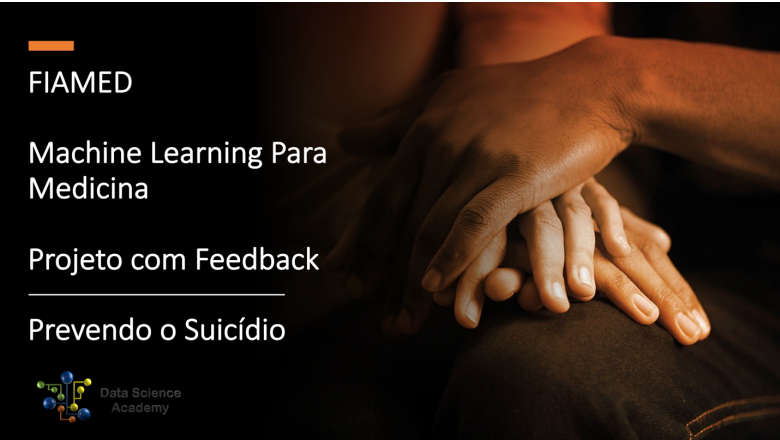



### Aluno: Antonildo Santos


## Preven√ß√£o de Suic√≠dio

## Defini√ß√£o do Projeto


### Porque √© importante prever o suic√≠dio?


Segundo a OMS, o suic√≠dio √© a 3¬™ causa de morte de jovens brasileiros entre 15 e 29 anos. No Brasil, cerca de 12 mil pessoas tiram a pr√≥pria vida por ano, quase 6% da popula√ß√£o. No mundo, s√£o cerca de 800 mil de suic√≠dios anuais. O Brasil s√≥ perde para os EUA.

No mundo, as notifica√ß√µes apontam para um suic√≠dio a cada 40 segundos. No Brasil, a cada 46 minutos, uma realidade devastadora quando se identifica o perfil das v√≠timas brasileiras: a maioria √© homem, negro, com idade entre 10 e 29 anos, segundo dados do Minist√©rio da Sa√∫de. Na Bahia, entre 2010 e 2019, foram contabilizados 8.833 casos de les√µes autoprovocadas e, destes, 5.160 foram casos de suic√≠dio. 

Fonte:
http://www.saude.ba.gov.br/2020/09/10/oms-alerta-suicidio-e-a-3a-causa-de-morte-de-jovens-brasileiros-entre-15-e-29-anos/

Alguns dados sobre suic√≠dio fornecidos pela Organiza√ß√£o Mundial de Sa√∫de:
* Quase 800.000 pessoas morrem por suic√≠dio todos os anos. Al√©m disso, para cada suic√≠dio, ocorrem mais de 20 tentativas de suic√≠dio.
* Suic√≠dios e tentativas de suic√≠dio t√™m um efeito cascata que afeta fam√≠lias, amigos, colegas, comunidades e sociedades.
* Os suic√≠dios s√£o evit√°veis. Muito pode ser feito para prevenir o suic√≠dio em n√≠vel individual, comunit√°rio e nacional.

Algumas estat√≠sticas sobre suic√≠dio no Brasil: 
* A  maioria  dos  registros  de  suic√≠dio  no  Brasil  entre  2010  e  2019  foram  de  pessoas solteiras (54,46%).
* Os  meses  de  Dezembro,  Outubro  e  Mar√ßo,  respectivamente,  contam  com  o  maior n√∫mero de casos de suic√≠dio.
* A m√©dia de suic√≠dios ao longo de 2010 e 2019, por ano, √© de 11249. De modo geral, o n√∫mero bruto de suic√≠dios vem aumentando ao longo dos anos.-O local mais comum para ocorr√™ncia do suic√≠dio √© no domic√≠lio (60,89% dos casos).
* A maioria dos casos de suic√≠dio n√£o recebeu assist√™ncia m√©dica preventiva.

Neste mini-projeto trabalharei com um tema relevante para a sociedade e ao mesmo tempo demonstrarei minhas habilidades em Machine Learning estudadas no curso.





## Dataset

Para essa tarefa, usarei um conjunto de dados disponibilizado publicamente no Kaggle [dataset](https://www.kaggle.com/nikhileswarkomati/suicide-watch), extraido de postagens dos subreddits "SuicideWatch" e "depression" da plataforma Reddit. O Reddit √© uma plataforma preferida por pessoas com problemas emocionais, por isso fornece pistas significativas para o suic√≠dio.

As postagens foram coletadas usando a API Pushshift. Todas as postagens feitas para "SuicideWatch" foram coletadas de 16 de dezembro de 2008 (cria√ß√£o) at√© 2 de janeiro de 2021 , enquanto as postagens de "depression" foram coletadas de 1 de janeiro de 2009 a 2 de janeiro de 2021.

Cr√©ditos para Nikhileswar Komati por coletar e disponibilizar as informa√ß√µes na plataforma Kaggle.

#### Obs.: A fonte de dados j√° est√° previamente balanceada.
  
Um exemplo de post categorizado como suic√≠dio:

'I've become so accustomed to the fact that I'm going to kill myself that other people's struggles with suicide don't register to me muchBecause I think about it so much I just see them as another person like me. It also makes me feel like everyone is like me, so if I went to kill myself and people were around nobody would care.'

Usaremos 116037 postagens de cada categoria (suicide, non-suicide). Nosso vocabul√°rio ser√° de tamanho 5.500. Al√©m disso, cada documento ser√° representado por uma tag - para fins de visualiza√ß√£o. Por exemplo, o 50¬∫ documento classificado com suic√≠dio ser√° representado como suic√≠dio-50.


Usaremos a seguinte estrat√©gia:

1. Extrair os dados dos textos das postegens e aprender as word embeddings.
2. Extrair conjuntos rand√¥micos de documentos dos word embeddings j√° treinados.
3. Preparar os dados para os modelos de treinamento e avalia√ß√£o doc2Vec
4. Construir o vocabul√°rio atrav√©s de um modelo doc2vec - Distributed Bag of Words (DBOW)
5. Aplicar um modelo de Regress√£o Log√≠stica para classifica√ß√£o
6. Apresentar ao modelo dados n√£o envolvidos no processo de treinamento e teste para validar a capacidade do modelo classificar corretamente as postagens.

## Carregando os Dados

In [1]:
# Imports

import pandas as pd
import os
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud
from IPython.display import Image
import collections
import random
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report, accuracy_score, roc_curve, auc, precision_score, recall_score, roc_auc_score 
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from tqdm import tqdm
from sklearn import utils
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# Carregando o Dataset
Suicide_Detection = pd.read_csv('.\Suicide_Detection.zip', encoding='latin-1')

In [3]:
# Carregando o Dataset
Suicide_Detection = pd.read_csv('.\Suicide_Detection.zip')

In [4]:
Suicide_Detection.shape

(232074, 3)

### Explorando os dados

In [5]:
Suicide_Detection

Unnamed: 0                                               text  \
0                2  Ex Wife Threatening SuicideRecently I left my ...   
1                3  Am I weird I don't get affected by compliments...   
2                4  Finally 2020 is almost over... So I can never ...   
3                8          i need helpjust help me im crying so hard   
4                9  I‚Äôm so lostHello, my name is Adam (16) and I‚Äôv...   
...            ...                                                ...   
232069      348103  If you don't like rock then your not going to ...   
232070      348106  You how you can tell i have so many friends an...   
232071      348107  pee probably tastes like salty teaüòèüí¶‚ÄºÔ∏è can som...   
232072      348108  The usual stuff you find hereI'm not posting t...   
232073      348110  I still haven't beaten the first boss in Hollo...   

              class  
0           suicide  
1       non-suicide  
2       non-suicide  
3           suicide  
4           suicide  
...             ...  
232069  non-suicide  
232070  non-suicide  
232071  non-suicide  
232072      suicide  
232073  non-suicide  

[232074 rows x 3 columns]

In [6]:
print(Suicide_Detection.groupby(['class'])['class'].count())

class
non-suicide    116037
suicide        116037
Name: class, dtype: int64


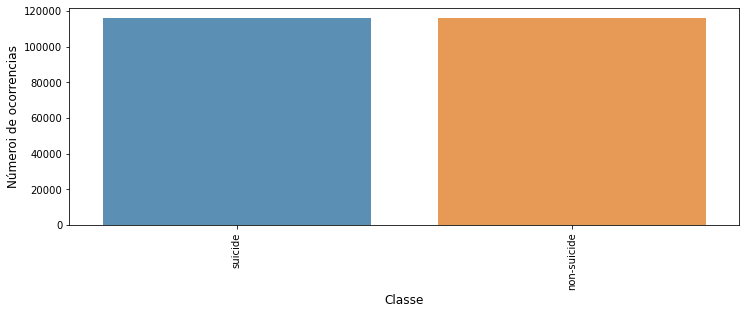

In [7]:
topic = Suicide_Detection['class'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(topic.index, topic.values, alpha=0.8)
plt.ylabel('N√∫meroi de ocorrencias', fontsize=12)
plt.xlabel('Classe', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [8]:
# Verificando a quantidade de palavras existentes no conjunto de dados
Suicide_Detection['text'].apply(lambda x: len(x.split(' '))).sum()

30528508

Temos mais de 30 milh√µes de palavras, trata-se de um conjunto de dados relativamente grande.

In [9]:
# Criando vari√°veis auxiliares para explora√ß√£o dos dados
Suicide_Detection['post_len'] = Suicide_Detection['text'].astype(str).apply(len)
Suicide_Detection['word_count'] = Suicide_Detection['text'].apply(lambda x: len(str(x).split()))

### Visualizando a distribui√ß√£o do comprimento do texto das Postagens

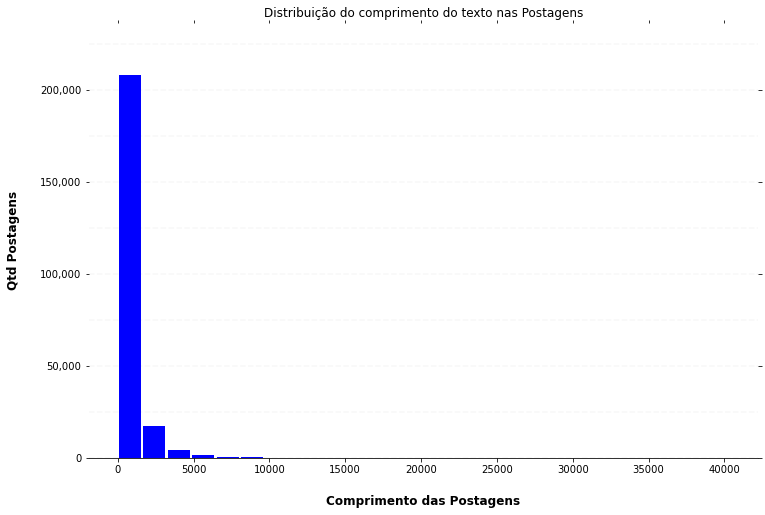

In [10]:
ax = Suicide_Detection.hist(column='post_len', bins=25, grid=False, figsize=(12,8), color='blue', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # title
    x.set_title("Distribui√ß√£o do comprimento do texto nas Postagens")

    # Set x-axis label
    x.set_xlabel("Comprimento das Postagens", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Qtd Postagens", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,g}'))

### Visualizando a distribui√ß√£o da contagem de palavras das Postagens

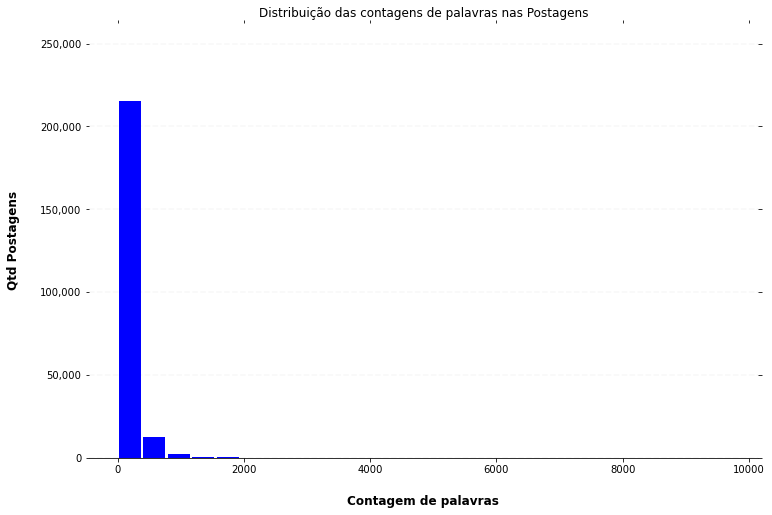

In [11]:
ax = Suicide_Detection.hist(column='word_count', bins=25, grid=False, figsize=(12,8), color='blue', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # title
    x.set_title("Distribui√ß√£o das contagens de palavras nas Postagens")

    # Set x-axis label
    x.set_xlabel("Contagem de palavras", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Qtd Postagens", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,g}'))

A maiorias das postagens possuem at√© mais ou menos 1600 caracteres, com at√© mais ou menos 400 palavras.

### Visualizando a Nuvem de Palavras das Postagens

Nuvens de palavras s√£o representa√ß√µes gr√°ficas da frequ√™ncia das palavras que d√£o maior destaque √†s palavras que aparecem com mais frequ√™ncia em um texto de origem. Quanto maior a palavra no visual, mais comum ela √© no (s) texto (s). Esse tipo de visualiza√ß√£o pode ajudar os avaliadores com an√°lise textual explorat√≥ria, identificando palavras que aparecem com frequ√™ncia em um conjunto de entrevistas, documentos ou texto. Tamb√©m pode ser usado para comunicar os pontos ou temas mais salientes no est√°gio de relat√≥rio.

In [12]:
stop_words = set(stopwords.words('english'))
posts = Suicide_Detection['text']
posts = [w for w in posts if not w in stop_words]
all_posts = " ".join(p for p in posts)

In [13]:
wordcloud = WordCloud(background_color='black', width=1600,                            
                      height=800, max_words=400).generate(all_posts)

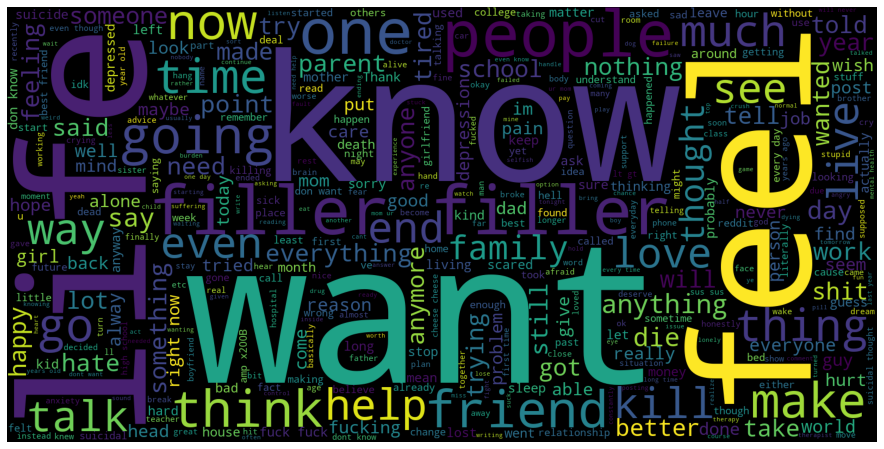

In [14]:
fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud, interpolation='bilinear')       
ax.set_axis_off()
plt.imshow(wordcloud)  

## Engenharia de Atributos

In [15]:
# Eliminando informa√ß√µes que n√£o ser√£o utilizadas no processo de treinamento do modelo
Suicide_Detection.drop(columns = ["Unnamed: 0", "post_len", "word_count"], inplace=True)

In [16]:
labels = Suicide_Detection['class'].values

In [17]:
# Definindo as percventagens de dados de treino, teste e valida√ß√£o
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

In [18]:
# Diivis√£o dos dados em treino e teste
dados_treino, dados_teste = train_test_split(Suicide_Detection,                                  
                                             test_size = 1 - train_ratio, 
                                             random_state = 43, stratify=labels)

In [19]:
# Os dados de valida√ß√£o estar√° representado por 15% do conjunto de dados inicial
dados_validacao, dados_teste = train_test_split(dados_teste, test_size=test_ratio/(test_ratio + validation_ratio),
                                                random_state = 43) 

In [20]:
dados_teste.head(10)

text        class
117065  I would pay all my money to hire someone to ki...      suicide
43317   The cowards way outPeople talk about suicide l...      suicide
19684   If I have a kid and they come out as Croatian ...  non-suicide
120617  Which youtube channel do you believe produces ...  non-suicide
28821   Almost got hit by a fucking milk truck So i wa...  non-suicide
223617  Thanks 2020I just got back from vacation to fi...      suicide
183675  I think thats itI (19m) was supposed to do it ...      suicide
22440   I'm worried about what will happen to my dog, ...      suicide
207735  I get this sort of way, this depressed, misera...      suicide
231816  Tutor thinks he is more important than grandma...  non-suicide

### Lendo os dados com pr√©-processamento utilizando a biblioteca NLTK

Agora vamos efetuar a leitura dos dados, converter o texto para letras min√∫scula, remo√ß√£o de contra√ß√µes e depois converter em tokens usando a biblioteca nltk. Temos duas fun√ß√µes read_data para montar os dados de treino e read_test_data para montar os dados de teste.

In [21]:
import re

contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", 
                    "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", 
                    "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", 
                    "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  
                    "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", 
                    "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have",
                    "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", 
                    "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                    "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", 
                    "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
                    "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", 
                    "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", 
                    "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is",
                    "that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", 
                    "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", 
                    "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", 
                    "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", 
                    "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", 
                    "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", 
                    "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", 
                    "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", 
                    "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", 
                    "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                    "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", 
                    "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", 
                    "you've": "you have"}
def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re
contractions, contractions_re = _get_contractions(contraction_dict)
def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

In [22]:
def read_data(filename):
    """
    Extrai as postagnes dos dados de treino e efetua o pr√©-processamento usando a biblioteca nltk python
    
    """
    data  = [[],[]] 
    train_data = {}
    for i in  tqdm(range(filename.shape[0])):
        text_string = filename[i, 0]
        text_string = text_string.lower()
        """ Limpeza do texto"""
        text_string = ''.join(c for c in text_string if not c.isdigit())
        text_string = replace_contractions(text_string)
        """tokenize"""
        tokenizer = RegexpTokenizer(r'\w+')
        text_string = tokenizer.tokenize(text_string)
        # Atribui a classe aos arquivos
        """ Elimina Sporwords """
        text_string  = [w for w in text_string if not w in stop_words]
        
        data[0].append(text_string)
        data[1].append(filename[i, 1])
        
        train_data[str(filename[i, 1])+'_'+str(i)] = text_string
    print('\tConclu√≠da a leitura de dados treino') 
               
    return data, train_data

def read_test_data(filename):
    """
    Extrai as postagens dos dados de teste e efetua o pr√©-processamento usando a biblioteca nltk python
    """
    test_data = {}
    for i in  tqdm(range(filename.shape[0])):
        text_string = filename[i, 0]
        text_string = text_string.lower()
        """ Limpeza do texto"""
        text_string = ''.join(c for c in text_string if not c.isdigit())
        text_string = replace_contractions(text_string) 
        tokenizer = RegexpTokenizer(r'\w+')
        text_string = tokenizer.tokenize(text_string)
        # Atribui a classe aos arquivos
        """ Atribui a rela√ß√£o ao documento """
        test_data[str(filename[i, 1])+'_'+str(i)] = text_string
    print('\tConclu√≠da a leitura de dados teste') 
               
    return test_data

print('Processando dados de treinamento...\n')
words, train_words = read_data(np.array(dados_treino))

print('\nProcessando dados de teste...\n')

test_words = read_test_data(np.array(dados_teste))

Processando dados de treinamento...



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162451/162451 [00:57<00:00, 2817.48it/s]


	Conclu√≠da a leitura de dados treino

Processando dados de teste...



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 34812/34812 [00:12<00:00, 2795.90it/s]


	Conclu√≠da a leitura de dados teste


### Construindo os Dicion√°rios
Para entender cada um desses elementos, vamos tamb√©m assumir o texto "Eu gosto de ir √† escola"

* `dictionary`: mapeia uma palavra para um ID (i.e. {Eu:0, gosto:1, de:2, ir:3, √†:4, escola:5})
* `reverse_dictionary`: mapeia um ID para uma palavra (i.e. {0:Eu, 1:gosto, 2:de, 3:ir, 4:√†, 5:escola}
* `count`: Lista de elementos (palavra, frequ√™ncia) (i.e. [(Eu,1),(gosto,1),(de,2),(ir,1),(√†,1),(escola,1)]
* `data` : Cont√©m a string de texto que lemos, onde palavras s√£o substitu√≠das por IDs de palavras (i.e. [0, 1, 2, 3, 2, 4])

Tamb√©m introduzimos um token especial adicional chamado `UNK` para indicar que palavras raras s√£o muito raras para serem usadas.

In [23]:
vocabulary_size = 5500
Words  = []
def build_dataset(words):
    for word in words[0]:
        Words.extend(word)  
    count = [['UNK', -1]]
    count.extend(collections.Counter(Words).most_common(vocabulary_size - 1))
    # Dicion√°rio das senten√ßas
    dictionary = dict()
    for word, _ in count:
        dictionary[word] = len(dictionary)
    
    data = list()
    unk_count = 0
    for word in Words:
        if  word in dictionary:            
            index = dictionary[word]
        else:
            index = 0  # dictionary['UNK']            
            unk_count = unk_count + 1
            
        data.append(word)

    count[0][1] = unk_count
    assert len(dictionary) == vocabulary_size

    return data, count, dictionary

def build_dataset_with_existing_dictionary(words, dictionary):
    '''
    Aqui usamos essa fun√ß√£o para converter strings de palavras em IDs com um determinado dicion√°rio
    '''
    data = list()
    for word in words:
        if word in dictionary:
            index = dictionary[word]
        else:
            index = 0  # dictionary['UNK']
        data.append(word)
    return data

# Processando dados de treino
data, count, dictionary = build_dataset(words)

train_data = {}

print('Construindo o dataset de treino para o documento\n')
for k,v in tqdm(train_words.items()):
    train_data[k] = build_dataset_with_existing_dictionary(train_words[k],dictionary)

# Processando dados de teste

test_data = {}

print('Construindo o dataset de teste para o documento\n')
for k,v in tqdm(test_words.items()):
    test_data[k] = build_dataset_with_existing_dictionary(test_words[k],dictionary)
    
print('\nPalavras mais comuns (+UNK)', count[:5])
print('\nAmostra de dados', data[:10])
print('\nChaves: ', test_data.keys())
print('\nItems: ', test_data.items())

# Removemos para liberar mem√≥ria no computador, pois n√£o precisamos mais desses objetos. Manterei apenas o dicion√°rio 
del words  
del data
del count
#del dictionary

Construindo o dataset de treino para o documento



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162451/162451 [00:03<00:00, 43196.97it/s]


Construindo o dataset de teste para o documento



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 34812/34812 [00:01<00:00, 33626.17it/s]



Palavras mais comuns (+UNK) [['UNK', 732695], ('like', 127154), ('want', 104530), ('know', 92177), ('feel', 85942)]

Amostra de dados ['moved', 'husbands', 'job', 'left', 'everything', 'behind', 'slowly', 'slipping', 'away', 'moved']



Chaves:  dict_keys(['suicide_0', 'suicide_1', 'non-suicide_2', 'non-suicide_3', 'non-suicide_4', 'suicide_5', 'suicide_6', 'suicide_7', 'suicide_8', 'non-suicide_9', 'suicide_10', 'suicide_11', 'suicide_12', 'suicide_13', 'non-suicide_14', 'suicide_15', 'suicide_16', 'non-suicide_17', 'suicide_18', 'suicide_19', 'non-suicide_20', 'suicide_21', 'non-suicide_22', 'non-suicide_23', 'suicide_24', 'non-suicide_25', 'non-suicide_26', 'non-suicide_27', 'non-suicide_28', 'non-suicide_29', 'non-suicide_30', 'suicide_31', 'suicide_32', 'non-suicide_33', 'non-suicide_34', 'non-suicide_35', 'suicide_36', 'non-suicide_37', 'non-suicide_38', 'suicide_39', 'suicide_40', 'non-suicide_41', 'non-suicide_42', 'non-suicide_43', 'non-suicide_44', 'suicide_45', 'suicide_46', 'non-suicide_47', 'suicide_48', 'suicide_49', 'suicide_50', 'suicide_51', 'suicide_52', 'suicide_53', 'suicide_54', 'suicide_55', 'suicide_56', 'suicide_57', 'suicide_58', 'non-suicide_59', 'non-suicide_60', 'suicide_61', 'non-suicide_6


Items:  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Modelos de Treinamento e Avalia√ß√£o doc2Vec


Doc2vec √© um algoritmo n√£o supervisionado para gerar vetores para frases, par√°grafos ou documentos (Representa√ß√µes distribu√≠das de senten√ßas e documento). Trata-se de um conceito que foi apresentado em 2014 por Le & Mikilov, veja neste [artigo](https://arxiv.org/abs/1405.4053). Este algoritmo √© uma adapta√ß√£o do word2vec, sendo que os vetores gerados pelo doc2vec podem ser usados para tarefas como encontrar semelhan√ßas entre senten√ßas , par√°grafos ou documentos.

Um vetor de documento √© uma representa√ß√£o abstrata de comprimento vari√°vel do significado contextual de um determinado tipo de documento. Assim como um vetor de palavras, √© o produto do processo de treinamento para uma rede neural, onde a entrada √© tipicamente um termo one-hot encoded codificado a partir do vocabul√°rio do modelo e a sa√≠da √© uma distribui√ß√£o de probabilidade para palavras na pr√≥xima janela de contexto. 

Primeiramente instanciamos um modelo doc2vec - Distributed Bag of Words (DBOW). Na arquitetura word2vec, n√≥s temos os algoritmos  ‚Äúcontinuous bag of words‚Äù (CBOW) e ‚Äúskip-gram‚Äù (SG), j√° na arquitetura doc2vec, os algoritmos correspondentes s√£o ‚Äúdistributed memory‚Äù (DM) e ‚Äúdistributed bag of words‚Äù (DBOW).

O DBOW √© o modelo doc2vec an√°logo ao modelo Skip-gram do word2vec. Os vetores de par√°grafos s√£o obtidos pelo treinamento de uma rede neural na tarefa de prever uma distribui√ß√£o de probabilidade de palavras em um par√°grafo, dada uma palavra aleatoriamente amostrada do par√°grafo.

In [24]:
Image(url = './Imagens/Doc2Vec.png')

## Prepara√ß√£o dos dados para cria√ß√£o do vocabul√°rio no doc2vec

In [25]:
# Converte de Dicion√°rio para lista
data_train = [ [k,v] for k, v in train_data.items() ]
data_train = np.array(data_train)
data_test = [ [k,v] for k, v in test_data.items() ]
data_test = np.array(data_test)

In [26]:
# fun√ß√£o para Identificar as classes dos documentos e preparando os dados para o algoritimo
def prepara_dados(data):
    datax = [[],[]]
    for x in range(data.shape[0]):
        s = data[x][0]
        s = s.split("_")
        datax[0].append(s[0])
        datax[1].append(data[x][1])                
    return datax

data_train = prepara_dados(data_train)
data_test = prepara_dados(data_test)

In [27]:
def label_sentences(corpus, topics):
    """
    A implementa√ß√£o do Doc2Vec da Gensim exige que cada documento / par√°grafo tenha um r√≥tulo associado a ele.
¬†¬†¬†¬†Fiz isso usando o m√©todo TaggedDocument, etiquetando com a pr√≥pria classe do documento.
    """
   
    labeled = []
    tags = np.unique(topics, return_counts=False)
    for i, v in enumerate(corpus):
        label = [s for s in tags if topics[i] in s and len(s) == len(topics[i])]
        doc =  " ".join(str(x) for x in v)
        labeled.append(TaggedDocument(doc.split(), label))
    return labeled
X_train = label_sentences(data_train[1], data_train[0])
X_test  = label_sentences(data_test[1], data_test[0])

In [28]:
X_test[1]

TaggedDocument(words=['the', 'cowards', 'way', 'outpeople', 'talk', 'about', 'suicide', 'like', 'it', 's', 'the', 'cowards', 'way', 'out', 'but', 'i', 'challenge', 'you', 'to', 'stare', 'into', 'the', 'abyss', 'with', 'no', 'clue', 'what', 's', 'down', 'there', 'and', 'no', 'way', 'back', 'out', 'that', 's', 'no', 'cowards', 'way', 'out', 'in', 'my', 'book'], tags=['suicide'])

In [29]:
len(X_train)

162451

In [30]:
len(X_test)

34812

In [31]:
# Instanciando um modelo Doc2Vec com um vetor de 128 palavras

model_dbow = Doc2Vec(dm=0, vector_size=128, window=10, negative=5, cbow_mean=1, min_count=1, alpha=0.1, min_alpha=0.005)
model_dbow.build_vocab([x for x in tqdm(X_train)])


# Alicando 50 itera√ß√µes sobre o corpus de treinamento.

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(X_train)]), total_examples=len(X_train), epochs=10)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162451/162451 [00:00<00:00, 3621913.63it/s]


## Construindo os Vetores de Recurso para o Classificador

In [32]:
%%time

# Dados de treino

train_targets, train_regressors = zip(
    *[(doc.tags[0], model_dbow.infer_vector(doc.words, alpha=0.1, min_alpha=0.005, epochs=100)) for doc in tqdm(X_train)])

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162451/162451 [28:15<00:00, 95.82it/s]


Wall time: 28min 15s


In [33]:
%%time

# Dados de teste

test_targets, test_regressors = zip(
    *[(doc.tags[0], model_dbow.infer_vector(doc.words, alpha=0.1, min_alpha=0.005, epochs=100)) for doc in tqdm(X_test)])

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 34812/34812 [06:29<00:00, 89.27it/s]


Wall time: 6min 29s


In [34]:
X_test[45]

TaggedDocument(words=['i', 'want', 'to', 'be', 'betterrecently', 'life', 's', 'gotten', 'alot', 'worse', 'my', 'bipolar', 'flared', 'up', 'my', 'suicidal', 'thoughts', 'are', 'much', 'more', 'active', 'than', 'before', 'and', 'life', 'once', 'again', 'feels', 'like', 'suffering', 'every', 'moment', 'trying', 'to', 'survive', 'i', 'want', 'to', 'get', 'better', 'but', 'i', 'do', 'not', 'know', 'how', 'i', 'am', 'with', 'counselors', 'taking', 'antidepressants', 'and', 'mood', 'stabilizers', 'and', 'i', 'feel', 'like', 'it', 'is', 'my', 'fault', 'i', 'am', 'not', 'getting', 'better', 'everytime', 'someone', 'mentions', 'mental', 'health', 'abuse', 'or', 'anything', 'like', 'that', 'i', 'get', 'defensive', 'and', 'have', 'intrusive', 'thoughts', 'i', 'want', 'to', 'be', 'better', 'but', 'i', 'do', 'not', 'know', 'how', 'i', 'want', 'a', 'cry', 'for', 'help', 'in', 'a', 'suicide', 'attempt', 'not', 'to', 'actually', 'succeed', 'then', 'i', 'feel', 'like', 'i', 'am', 'just', 'attention', 's

## Treinando o Classificador de Regress√£o Log√≠stica.

In [35]:
# Aplicando de Regress√£o Logistica
topics = ['suicide','non-suicide']
logreg = LogisticRegression(n_jobs=1, C=0.1, solver = 'lbfgs', penalty = 'l2', max_iter=10000)
logreg.fit(train_regressors, train_targets)
y_pred = logreg.predict(test_regressors)
y_score = logreg.predict_proba(test_regressors)

In [36]:
print('accuracy %s' % accuracy_score(y_pred, test_targets))
print(classification_report(test_targets, y_pred,target_names=topics))

accuracy 0.9248247730667586
              precision    recall  f1-score   support

     suicide       0.93      0.91      0.92     17302
 non-suicide       0.92      0.94      0.93     17510

    accuracy                           0.92     34812
   macro avg       0.93      0.92      0.92     34812
weighted avg       0.92      0.92      0.92     34812



In [37]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(topics))
    target_names = topics
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [38]:
def evaluate_prediction(predictions, target, title="Confusion matrix"):
    print('accuracy %s' % accuracy_score(target, predictions))
    cm = confusion_matrix(target, predictions, labels=topics)
    print('confusion matrix\n %s' % cm)
    print('(row=expected, col=predicted)')
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized, title + ' Normalized')
    return cm

accuracy 0.9248247730667586
confusion matrix
 [[16375  1135]
 [ 1482 15820]]
(row=expected, col=predicted)


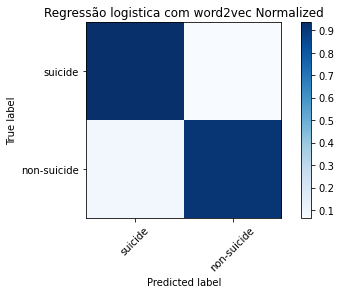

In [39]:
cm = evaluate_prediction(y_pred, np.array(test_targets), "Regress√£o logistica com word2vec")

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

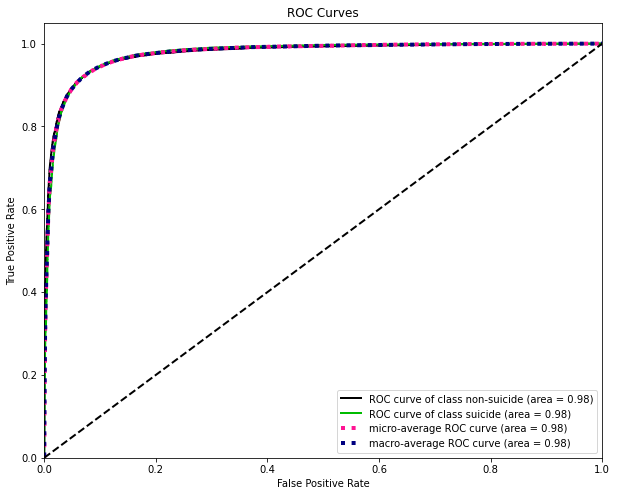

In [40]:
import scikitplot as skplt
skplt.metrics.plot_roc(test_targets, y_score, figsize=(10, 8))

Em uma curva Receiver Operating Characteristic (ROC), a taxa de verdadeiro positivo (Sensibilidade) √© tra√ßada em fun√ß√£o da taxa de falsos positivos (100-especificidade) para diferentes pontos de corte. Cada ponto na curva ROC representa um par de sensibilidade / especificidade correspondente a um determinado limite de decis√£o. Um teste com discrimina√ß√£o perfeita (sem sobreposi√ß√£o nas duas distribui√ß√µes) possui uma curva ROC que passa pelo canto superior esquerdo (100% de sensibilidade, 100% de especificidade). Portanto, quanto mais pr√≥xima a curva ROC estiver do canto superior esquerdo, maior ser√° a precis√£o geral do teste (Zweig & Campbell, 1993).

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

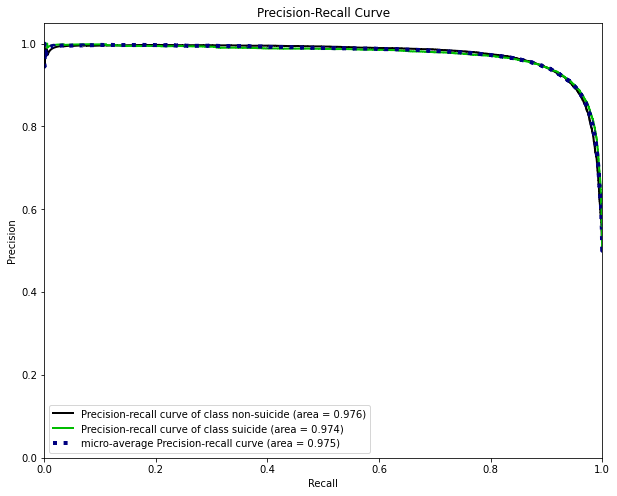

In [41]:
skplt.metrics.plot_precision_recall(test_targets, y_score, figsize=(10, 8))

A precision-recall curve mostra a compensa√ß√£o entre precis√£o e recupera√ß√£o para diferentes limites. Uma √°rea alta sob a curva representa alta recupera√ß√£o e alta precis√£o, onde alta precis√£o se relaciona a uma taxa baixa de falsos positivos e alta recupera√ß√£o se relaciona a uma baixa taxa de falsos negativos. Altas pontua√ß√µes para ambos mostram que o classificador est√° retornando resultados precisos (alta precis√£o), bem como retornando a maioria de todos os resultados positivos (alta recupera√ß√£o).

Os graficos de Curva ROC e Precis√£o-Recall demostram uma grande capacidade do modelo rotular todas as inst√¢ncias corretamente.

## Prepara√ß√£o dos dados de valida√ß√£o para aplica√ß√£o do algor√≠tmo

In [42]:
# Divis√£o dos dados em X e Y

X_validacao = dados_validacao.loc[:, dados_validacao.columns != 'class']
Y_validacao = dados_validacao['class']

In [43]:
def read_valid_data(filename):
    """
    Extrai as postagens dos dados de valida√ß√£o e efetua o pr√©-processamento usando a biblioteca nltk python
    """
    valid_data = {}
    for i in tqdm(range(filename.shape[0])):
        text_string = filename[i, 0]
        text_string = text_string.lower()
        """ Limpeza do texto"""
        text_string = ''.join(c for c in text_string if not c.isdigit())
        text_string = replace_contractions(text_string) 
        tokenizer = RegexpTokenizer(r'\w+')
        text_string = tokenizer.tokenize(text_string)
        # Atribui a classe aos arquivos
        """ Atribui a rela√ß√£o ao documento """
        valid_data[str(i)] = text_string
    print('\tConclu√≠da a leitura de dados de valida√ß√£o\n') 
               
    return valid_data

In [44]:
valid_words = read_valid_data(np.array(dados_validacao))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 34811/34811 [00:43<00:00, 809.07it/s]


	Conclu√≠da a leitura de dados de valida√ß√£o



In [45]:
# Processando dados de valida√ß√£o

valid_data = {}
    
print('Construindo o dataset de valida√ß√£o para a postagem\n')
for k,v in tqdm(valid_words.items()):
    valid_data[k] = build_dataset_with_existing_dictionary(valid_words[k],dictionary)

Construindo o dataset de valida√ß√£o para a postagem



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 34811/34811 [00:00<00:00, 35326.89it/s]


In [46]:
# Converte de Dicion√°rio para lista
data_valid = [ [k,v] for k, v in valid_data.items() ]
data_valid = np.array(data_valid)

In [47]:
data_valid = prepara_dados(data_valid)

In [48]:
X_valid = label_sentences(data_valid[1], data_valid[0])

## Construindo os Vetores de Recurso para o Classificador

In [49]:
%%time

# Dados de valida√ß√£o

valid_targets, valid_regressors = zip(
    *[(doc.tags[0], model_dbow.infer_vector(doc.words, alpha=0.1, min_alpha=0.005, epochs=100)) for doc in tqdm(X_valid)])

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 34811/34811 [06:15<00:00, 92.66it/s]


Wall time: 6min 15s


In [50]:
# Exclu√≠ndo o dicion√°rio
del dictionary

In [51]:
y_pred = logreg.predict(valid_regressors)
y_score = logreg.predict_proba(valid_regressors)

In [52]:
print('accuracy %s' % accuracy_score(y_pred, Y_validacao))
print(classification_report(Y_validacao, y_pred,target_names=topics))

accuracy 0.9233575593921461
              precision    recall  f1-score   support

     suicide       0.93      0.91      0.92     17510
 non-suicide       0.91      0.93      0.92     17301

    accuracy                           0.92     34811
   macro avg       0.92      0.92      0.92     34811
weighted avg       0.92      0.92      0.92     34811



accuracy 0.9233575593921461
confusion matrix
 [[16135  1166]
 [ 1502 16008]]
(row=expected, col=predicted)


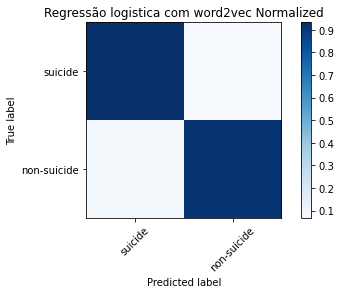

In [53]:
cm = evaluate_prediction(y_pred, np.array(Y_validacao), "Regress√£o logistica com word2vec")

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

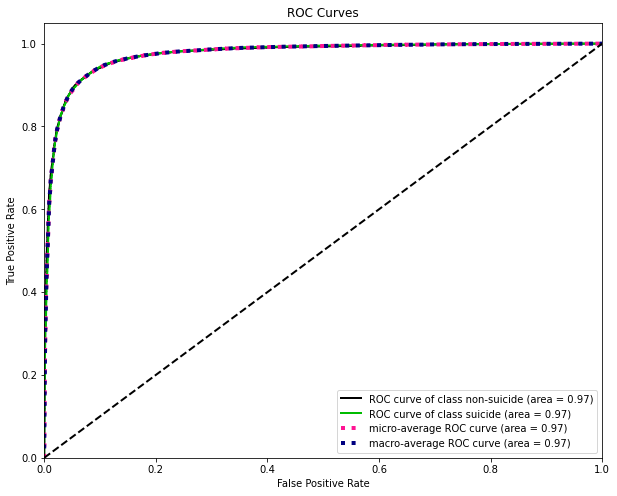

In [54]:
skplt.metrics.plot_roc(Y_validacao, y_score, figsize=(10, 8))

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

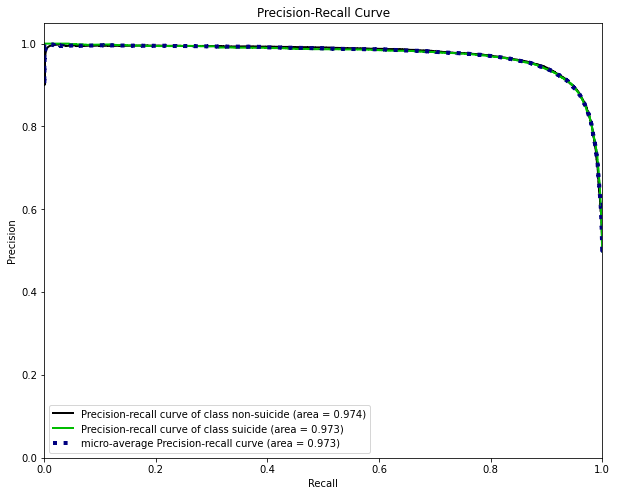

In [55]:
skplt.metrics.plot_precision_recall(Y_validacao, y_score, figsize=(10, 8))

Os graficos de Curva ROC e Precis√£o-Recall demostram uma grande capacidade do modelo rotular todas as inst√¢ncias corretamente.

## Cohen Kappa

O Cohen kappa √© uma m√©trica frequentemente usada para avaliar a concord√¢ncia entre dois avaliadores. Tamb√©m pode ser usado para avaliar o desempenho de um modelo de classifica√ß√£o, como muitas outras m√©tricas de avalia√ß√£o, o Cohen kappa √© calculado com base na matriz de confus√£o.

Landis e Koch (1977) classificam os diferentes n√≠veis de concord√¢ncia
(ou reprodutibilidade), o Kappa varia de 0 a 1, conforme mostra tabela abaixo:


      Valores de Kappa    Interpreta√ß√£o
           < 0            Aus√™ncia de concord√¢ncia
         0 - 0.20         Concord√¢ncia m√≠nima
      0.21 - 0.40         Concord√¢ncia razo√°vel
      0.41 - 0.60         Concord√¢ncia moderada
      0.61 - 0.80         Concord√¢ncia substancial
      0.81 - 1.00         Concord√¢ncia quase perfeita

A estat√≠stica kappa √© freq√ºentemente usada como uma medida de confiabilidade entre dois avaliadores humanos. No aprendizado de m√°quina supervisionado, um "avaliador" reflete a verdade b√°sica, ou seja, os valores reais de cada inst√¢ncia a ser classificada, obtidos a partir de dados rotulados, e o outro "avaliador" √© o classificador de aprendizado de m√°quina usado para realizar a classifica√ß√£o.

In [56]:
# Aplicando o Estat√≠stica Kappa
cohen_kappa = cohen_kappa_score(Y_validacao, y_pred)

In [57]:
cohen_kappa

0.8467273581502871

##### Conclus√£o 
Nosso modelo obteve um score Kappa de 0,85, de acordo a tabela, isso significa que h√° uma concord√¢ncia quase perfeita entre a classifica√ß√£o realizada pelo modelo e a classifica√ß√£o relacionada as postagens dos subreddits da plataforma Reddit, demonstrando que o modelo atingiu uma execelnete capacidade de classificar corretamente as postagens com coment√°rios de pessoas com potencial tendencia ao suic√≠dio.

# Fim

## Referencias

[Curso de Processamento de Linguagem Natural e Reconhecimento de Voz da Forma√ß√£o Intelig√™ncia Artificial - Datascienceacademy](https://www.datascienceacademy.com.br)

[Gemsin](https://radimrehurek.com/gensim/models/keyedvectors.html)

[Distributed Representations of Words and Phrases and their Compositionality](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf)

[Distributed Representations of Sentences and Documents](https://cs.stanford.edu/~quocle/paragraph_vector.pdf)

[A gentle introduction to Doc2Vec](https://medium.com/scaleabout/a-gentle-introduction-to-doc2vec-db3e8c0cce5e)

[Gensim Doc2Vec Tutorial on the IMDB Sentiment Dataset](https://github.com/RaRe-Technologies/gensim/blob/3c3506d51a2caf6b890de3b1b32a8b85f7566ca5/docs/notebooks/doc2vec-IMDB.ipynb)

[Document classification with word embeddings tutorial](https://github.com/RaRe-Technologies/movie-plots-by-genre/blob/master/ipynb_with_output/Document%20classification%20with%20word%20embeddings%20tutorial%20-%20with%20output.ipynb)

[Using Deep Learning for End to End Multiclass Text Classification](https://lionbridge.ai/articles/using-deep-learning-for-end-to-end-multiclass-text-classification/)

[Extracting Information from Text](https://www.nltk.org/book/ch07.html)
